In [235]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import math
from scipy.special import expit #Vectorized sigmoid function

In [471]:
digitData = "data/ex3data1.mat"
mat = scipy.io.loadmat(digitData)
# X is 5000 x 400 feature matrix where each row reprents an unrolled 20x20 image
X = mat['X']
# y is 5000 x 1 identifier matrix
y = mat['y']

# Insert row of 1's into X
# first param is the target matrix to insert into
# 0 is index 
# 1 is the value to insert
# axis = 1 inserts into rows and axis = 0 inserts into columns
# so now the first column in X is all 1s

# X.shape = (5000,401)
X = np.insert(X, 0, 1,axis = 1)


In [469]:
def reshapeRow(row):
    """
    @param {row} 1 x 401 matrix since an image of a digit is 20x20 + 1 that was added as a bias
    Function that takes in the pixel intensity values and puts it into a 20x20 square 
    """ 
    # the [1:] is used to take everything after the 1st index 
    
    return row[1:].reshape(20,20).T

def displayData(indiciesToDisplay = None):
    """
    Function that selects 100 random examples for the 5000 we have and organizes
    them into a 10x10 matrix
    """
    width = 20
    height = 20
    numRows = 10
    numCols = 10
    
    if not indiciesToDisplay:
        indiciesToDisplay = random.sample(range(X.shape[0]), numRows * numCols)

    
    bigPicture = np.zeros((height * numRows, width * numCols))
    
    iRow = 0
    iCol = 0

    for i in indiciesToDisplay :
        if iCol == numCols:
            iCol = 0
            iRow += 1
 
        curImg = reshapeRow(X[i])
        bigPicture[iRow * height :iRow * height + curImg.shape[0], 
                    iCol * width : iCol * width + curImg.shape[1]] = curImg
        iCol += 1 
    fig = plt.figure( figsize = (6,6) )
    img = scipy.misc.toimage( bigPicture )
    plt.imshow(img,cmap = cm.Greys_r)
    
        
    
    


c:\users\ammar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


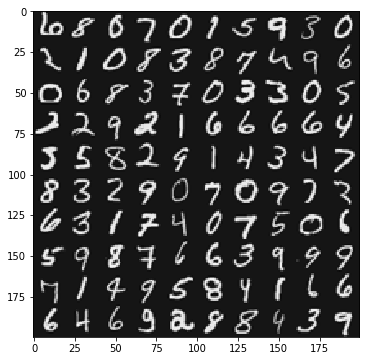

In [409]:
displayData()

In [545]:
# remove this function, can call sigmoid using sigmoid(np.dot(X,theta)) or something similar
def hypothesis(theta, X):
    return sigmoid(np.dot(X.T,theta))


def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(theta, X, y, lmbda = 0):
    
    # theta is passed in as a (num,) need to turn into a np.array (num, 1)
    theta = theta.reshape(theta.shape[0],1)

    # theta.shape = (401,1)
    # X.shape = (401,5000)
    # y.shape = (5000,1)
     
    tempTheta = theta
    tempTheta[0,0] = 0
    
    # m = 5000
    m = X.shape[1]  
    
    # hypo.shape = (5000,1)
    hypo = hypothesis(theta,X)
   
    # temp1.shape = (5000,5000)
    temp1 = np.log(hypo).dot(y.T)
    
    # temp2.shape = (5000,5000)
    temp2 = np.log(hypo).dot((1-y).T) 

    # J.shape = (5000,5000)
    J = (-1/m) * (temp1+temp2)  + (lmbda/2*m) * tempTheta.T.dot(tempTheta)
    print("J shape is (%d, %d)" %(J.shape[0],J.shape[1]))

    return J

def gradFunction(theta, X, y, lmbda = 0):
    
    # reshaping theta higher in the hierarchy doesn't seem to carry through functions....
    theta = theta.reshape(theta.shape[0],1)
    # theta.shape = (401,1)
    # X.shape = (401,5000)
    # y.shape = (5000,1)

    tempTheta = theta
    tempTheta[0,0] = 0
    
    
    m = X.shape[1]  
    
    # 1x5000
    temp = hypothesis(X,theta)
    
    # 1x5000
    error = temp - y.T
    
    grad = (1./m)*np.dot(error, X.T) + (lmbda/m)*tempTheta
    print("Grad shape is (%d, %d)" %(grad.shape[0],grad.shape[1]))
    return grad

In [546]:
from scipy import optimize
def optimizeTheta(theta, X, y, lmbda = 0):
    """
    
    """

    rc = optimize.fmin_cg(costFunction, fprime=gradFunction, x0=theta, \
                          args = (X, y ,lmbda), maxiter=50, disp=False,\
                          full_output = True)
    return rc[0], rc[1]

In [547]:
def createTheta():
    """
    Creates an optimized theta for each of the 10 classes
    """
    lmbda = 0 
    # need 400 thetas since there are 400 features
    # X.shape[1] = 400
    # tempheta = 401 x 1
    tempTheta = np.zeros((X.shape[1],1))
    # Theta = 10 x 401
    Theta = np.zeros((10,X.shape[1]))
    curClass = 0
    itheta, imincost = optimizeTheta(tempTheta,X.T,y,lmbda)

    for i in range(10):
        if (i != 0):
            curClass = i
        else: 
            curClass = 10
        yClass = np.array
        #itheta, imincost = optimizeTheta(tempTheta,X.T,y,lmbda)
        #Theta[i,:] = itheta
            
            


In [548]:
createTheta()


Grad shape is (401, 401)
J shape is (5000, 5000)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()